# **Trabalhando com Planilhas do Excel**

In [1]:
#Importando a biblioteca pandas
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
#Juntando todos arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

In [ ]:
#Exbindo as 5 últimas linhas
df.tail()

In [ ]:
#Exibindo uma amostra de 10 linhas
df.sample(10)

In [ ]:
#Verificando os tipos de dados de cada coluna
df.dtypes

In [6]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
#Verificando os tipos de dados de cada coluna
df.dtypes

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

In [ ]:
#Verificando a quantidade de linhas e colunas
df.shape

### **Tratando valores faltantes**

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

In [ ]:
#Substituindo os valores numos pela média em memória
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#Vendo a média da coluna Vendas
df["Vendas"].mean()

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas colunas
df.dropna(how="all", inplace=True)

### **Criando colunas novas**

In [9]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"]) 

In [ ]:
#Mostrando as 5 primeiras linhas
df.head()

In [11]:
#Criando nova coluna
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
#Mostrando as 5 primeiras linhas
df.head()

In [ ]:
#Retornando a maior receita
df["Receita"].max()

In [ ]:
#Retornando a menor receita
df["Receita"].min()

In [ ]:
#3 maiores receitas
df.nlargest(3, "Receita")

In [ ]:
#3 menores receitas
df.nsmallest(3, "Receita")

In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

### **Trabalhando com datas**

In [15]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Verificando tipo de dados de cada coluna
df.dtypes

In [17]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#Verificando tipo de dados de cada coluna
df.dtypes

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

In [25]:
#Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
#Amostra de 5 linhas
df.sample(5)

In [28]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
#Amostra de 5 linhas
df.sample(5)

In [ ]:
#Retornado a data mais antiga
df["Data"].min()

In [33]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
#Amostra de 5 linhas
df.sample(5)

In [36]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
#Amostra de 5 linhas
df.sample(5)

In [64]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

### **Visualização de dados**

In [ ]:
df["LojaID"].value_counts(ascending=False)

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

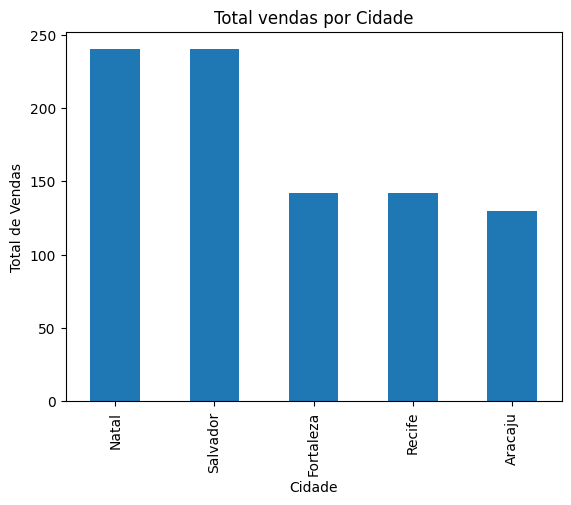

In [78]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade");
plt.xlabel("Cidade");
plt.ylabel("Total de Vendas");

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="#00ff00");
plt.xlabel("Cidade");
plt.ylabel("Total de vendas");

In [86]:
#Alterando o estilo
plt.style.use("ggplot")

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de Produtos vendidos por mês", color="#000000");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
#Pegando a quantidade de vendas por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

In [94]:
#Selecionando apenas vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

In [ ]:
#Total produtos vendidos por mês e gráfico
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Produtos vendidos por mês", marker = "o", color="purple");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
#Misograma
plt.hist(df["Qtde"], color="#FF00FF");

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o");
plt.title("Quantidade de produtos vendidos x mês");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico QTDE x MES.png");